This notebook reproduces plots in Figure 2.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
import statsmodels.stats.multitest as smm

Figures 2B and 2C

Figures 2D-F

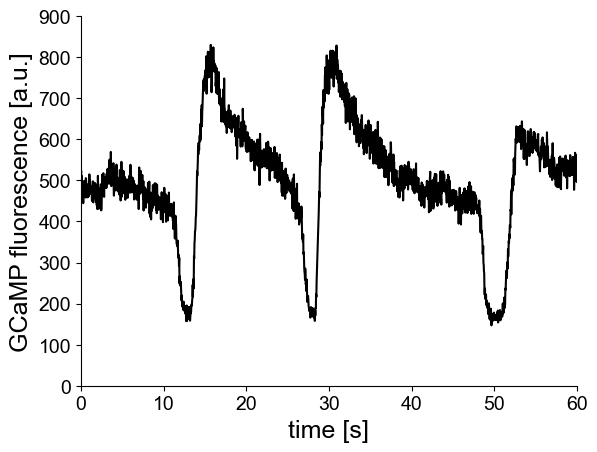

In [6]:
#Fig 2D
traces=pd.read_csv('../data/Fig2/A02l_GCaMP/original_traces_sample5.csv')
plt.rcParams["font.family"] = "Arial"
plt.plot(traces['time']-11,traces['A02l_A3L'], color='k')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0,60)
plt.ylim(0,900)
plt.xlabel('time [s]', fontsize=18)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/Fig2D.svg')

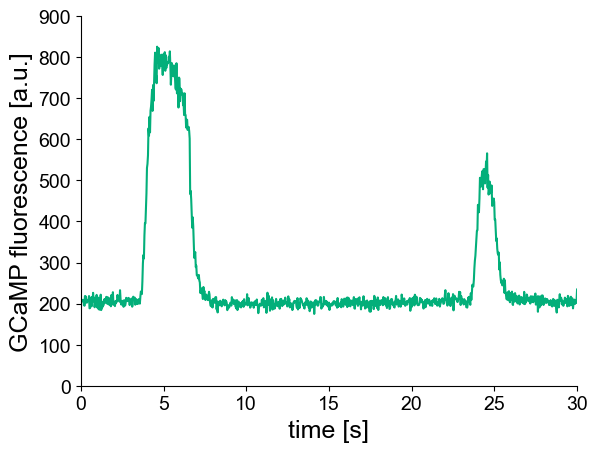

In [8]:
#Fig 2E
traces=pd.read_csv('../data/Fig2/A02l_GCaMP_kir/sample_3_original_traces.csv')
plt.rcParams["font.family"] = "Arial"
plt.plot(traces['time']-75,traces['A02l_A3L'], color=(3/255,175/255,122/255))
plt.xlabel('time [s]', fontsize=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0,900)
plt.xlim(0,30)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/Fig2E.svg')

In [10]:
#loading baseline and dip F data
baselline_w=np.load('../data/Fig2/A02l_GCaMP/baseline_w.npy')
baseline_kir=np.load('../data/Fig2/A02l_GCaMP_kir/baseline_kir.npy')
dip_F_w=np.load('../data/Fig2/A02l_GCaMP/minimum_F_dip_w/sample1.npy')
for i in range(2,6):
    dip_F_w=np.concatenate((dip_F_w,np.load('../data/Fig2/A02l_GCaMP/minimum_F_dip_w/sample'+str(i)+'.npy')),axis=0)

In [12]:
#statistial test
s1, p1=scipy.stats.brunnermunzel(baselline_w, baseline_kir)
s2, p2=scipy.stats.brunnermunzel(dip_F_w, baseline_kir)
corrected_p_values = smm.multipletests([p1, p2], alpha=0.05, method='holm')[1]
print("Corrected p-values:[baseline_w vs baseline_kir, dip_F_w vs baseline_kir]")
print(corrected_p_values)

Corrected p-values:[baseline_w vs baseline_kir, dip_F_w vs baseline_kir]
[2.19817748e-21 5.34757895e-17]


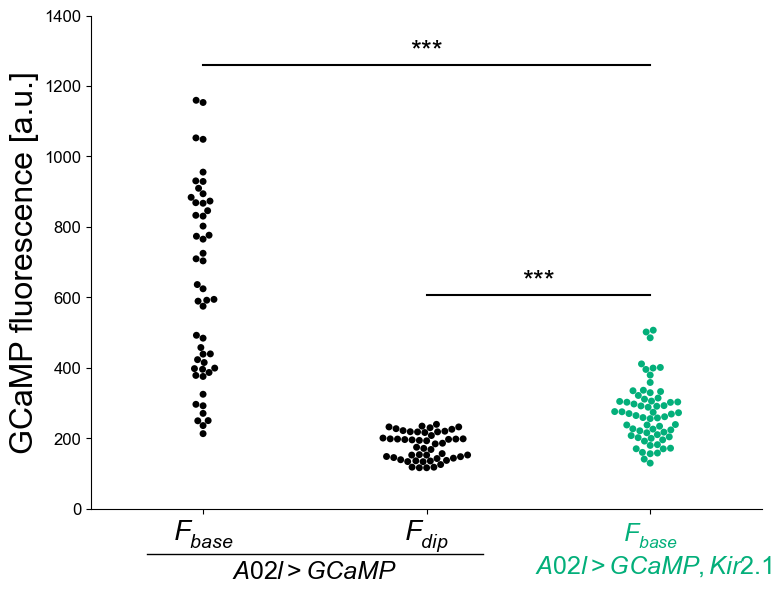

In [13]:
#Fig 2F
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['font.family'] = 'Arial'

sns.swarmplot(data=[baselline_w, dip_F_w, baseline_kir],palette=['k','k',(3/255,175/255,122/255)])
ax.tick_params(labelbottom=False, labeltop=False)
plt.ylim(0,1400)
plt.xlim(-0.5,2.5)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=23)
plt.yticks(fontsize=16)
ax.text(0, -120, "$F_{base}$", ha='center', va='bottom', color='k',  fontsize=20)
ax.text(1, -130, "$F_{dip}$", ha='center', va='bottom', color='k',  fontsize=20)
ax.text(2, -200, "$F_{base}$\n $\it{A02l>GCaMP, Kir2.1}$", ha='center', va='bottom', color=(3/255,175/255,122/255),  fontsize=18)
ax.plot([-0.25,-0.25,1.25,1.25],[-130,-130,-130,-130],lw=1, c='k', clip_on=False)
plt.text(0.5,-200,'$\it{A02l>GCaMP}$',ha='center', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


x1, x2 = 0, 2
y, h, col = baselline_w.max() + 100, 0, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,  fontsize=20)
plt.yticks(fontsize=12)

x1, x2 = 1, 2
y, h, col = baseline_kir.max() + 100, 0, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,  fontsize=20)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('figures/Fig2F.svg')